# 0.0 IMPORTAR BIBLIOTECAS

In [1]:
import math
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML


In [2]:
# Ajustar gráficos
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


## 0.1 Funções

## 0.2 Carregar base de dados

In [4]:
df_sales_raw = pd.read_csv( '../datasets/train.csv', low_memory=False )
df_store_raw = pd.read_csv( '../datasets/store.csv', low_memory=False )

# merge entre os dois dataframes
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

# 1.0 DESCRICAO DOS DADOS

In [5]:
df1 = df_raw.copy()

In [6]:
# Renomear as colunas para mdoelo snakecase

cols_old = df1.columns
snakecase = lambda x: inflection.underscore( x )
cols_new = list( map( snakecase, cols_old ) )
df1.columns = cols_new

## 1.2. Tamanho dos dados (shape)

In [9]:
df1.shape

(1017209, 18)

In [10]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Tipo dos Dados (Dtypes)

In [11]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [12]:
# Tranaformar a coluna Date para formato de data
df1['date'] = pd.to_datetime( df1['date'] )


## 1.4. Checagem de N/As

In [13]:
df1.isna().sum()


store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Como proceder para a retirada dos NAs ?

- Descartar todas as linhas com NA.
- Usando algoritmos de ML para inserir dados.
- Entendendo o negócio para inserir dados.

## 1.5 Preencher os NA

In [14]:
# competition_distance              
### Para todos os campos NA nesta coluna considerar e inserir o valor de 200.000 (valor máximo escolhido para este df)
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x )

# competition_open_since_month  
### Para todos os campos NA nesta coluna considerar e inserir o valor do mês da venda (Coluna "date").
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)

# competition_open_since_year       
### Para todos os campos NA nesta coluna considerar e inserir o valor do ano da venda (Coluna "date").
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'],axis=1)

# promo2_since_week 
### Para todos os campos NA nesta coluna considerar e inserir o valor da semana da venda (Coluna "date").
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)

# promo2_since_year
### Para todos os campos NA nesta coluna considerar e inserir o valor do ano da venda (Coluna "date").
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'],axis=1)

# promo_interval
month_map = {1: 'Jan',2: 'Fev',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug', 9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
df1['promo_interval'].fillna(0, inplace=True) # substituir todos os NA para 0 (zero)
df1['month_map'] = df1['date'].dt.month.map(month_map) # criar uma nova coluna e inserir o mês da coluna "Date" conforme a variavel "month_map"
df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)


In [15]:
df1.sample(5).T

,212283,230689,563421,82075,999712
store,434,1000,17,681,343
day_of_week,4,2,2,2,3
date,2015-01-22 00:00:00,2015-01-06 00:00:00,2014-02-11 00:00:00,2015-05-19 00:00:00,2013-01-16 00:00:00
sales,8284,0,4934,4683,4333
customers,617,0,723,576,517
open,1,0,1,1,1
promo,0,1,0,1,0
state_holiday,0,a,0,0,0
school_holiday,0,0,0,0,0
store_type,a,a,a,a,d


In [16]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Tipos de Mudança

In [17]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [18]:
# transformar valores para inteiros
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

## 1.7 Descrição Estatística dos dados

Métricas de tendência central : 

- media 
- mediana

Métricas de dispersão : 

- desvio padrão
- valor minimo
- valor máximo
- faixa(range) 
- skew(inclinação)
- curtose 

In [20]:
numericos = df1.select_dtypes(include=['int64','float64' ])
categoricos = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### 1.7.1. Atributos Numéricos

In [21]:
# Métricas de tendência central 
media = pd.DataFrame ( numericos.apply(np.mean)).T
mediana = pd.DataFrame ( numericos.apply(np.median)).T

In [22]:
# Métricas de dispersão
desvio_padrao = pd.DataFrame ( numericos.apply(np.std)).T
minimo = pd.DataFrame ( numericos.apply(min)).T
maximo = pd.DataFrame ( numericos.apply(max)).T
faixa = pd.DataFrame ( numericos.apply(lambda x: x.max() - x.min())).T
inclinação = pd.DataFrame ( numericos.apply(lambda x: x.skew() )).T
curtose = pd.DataFrame ( numericos.apply(lambda x: x.kurtosis())).T

In [23]:
#Concatenar
metricas = pd.concat([minimo, maximo, faixa, media, mediana, desvio_padrao, inclinação, curtose ]).T.reset_index()
metricas.columns = ['attributes','min','max','range','mean', 'median', 'std', 'skew','kurtosis' ]
metricas

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2. Atributos Categóricos

In [24]:
# Quantos niveis cada variável categorica possui ?
categoricos.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

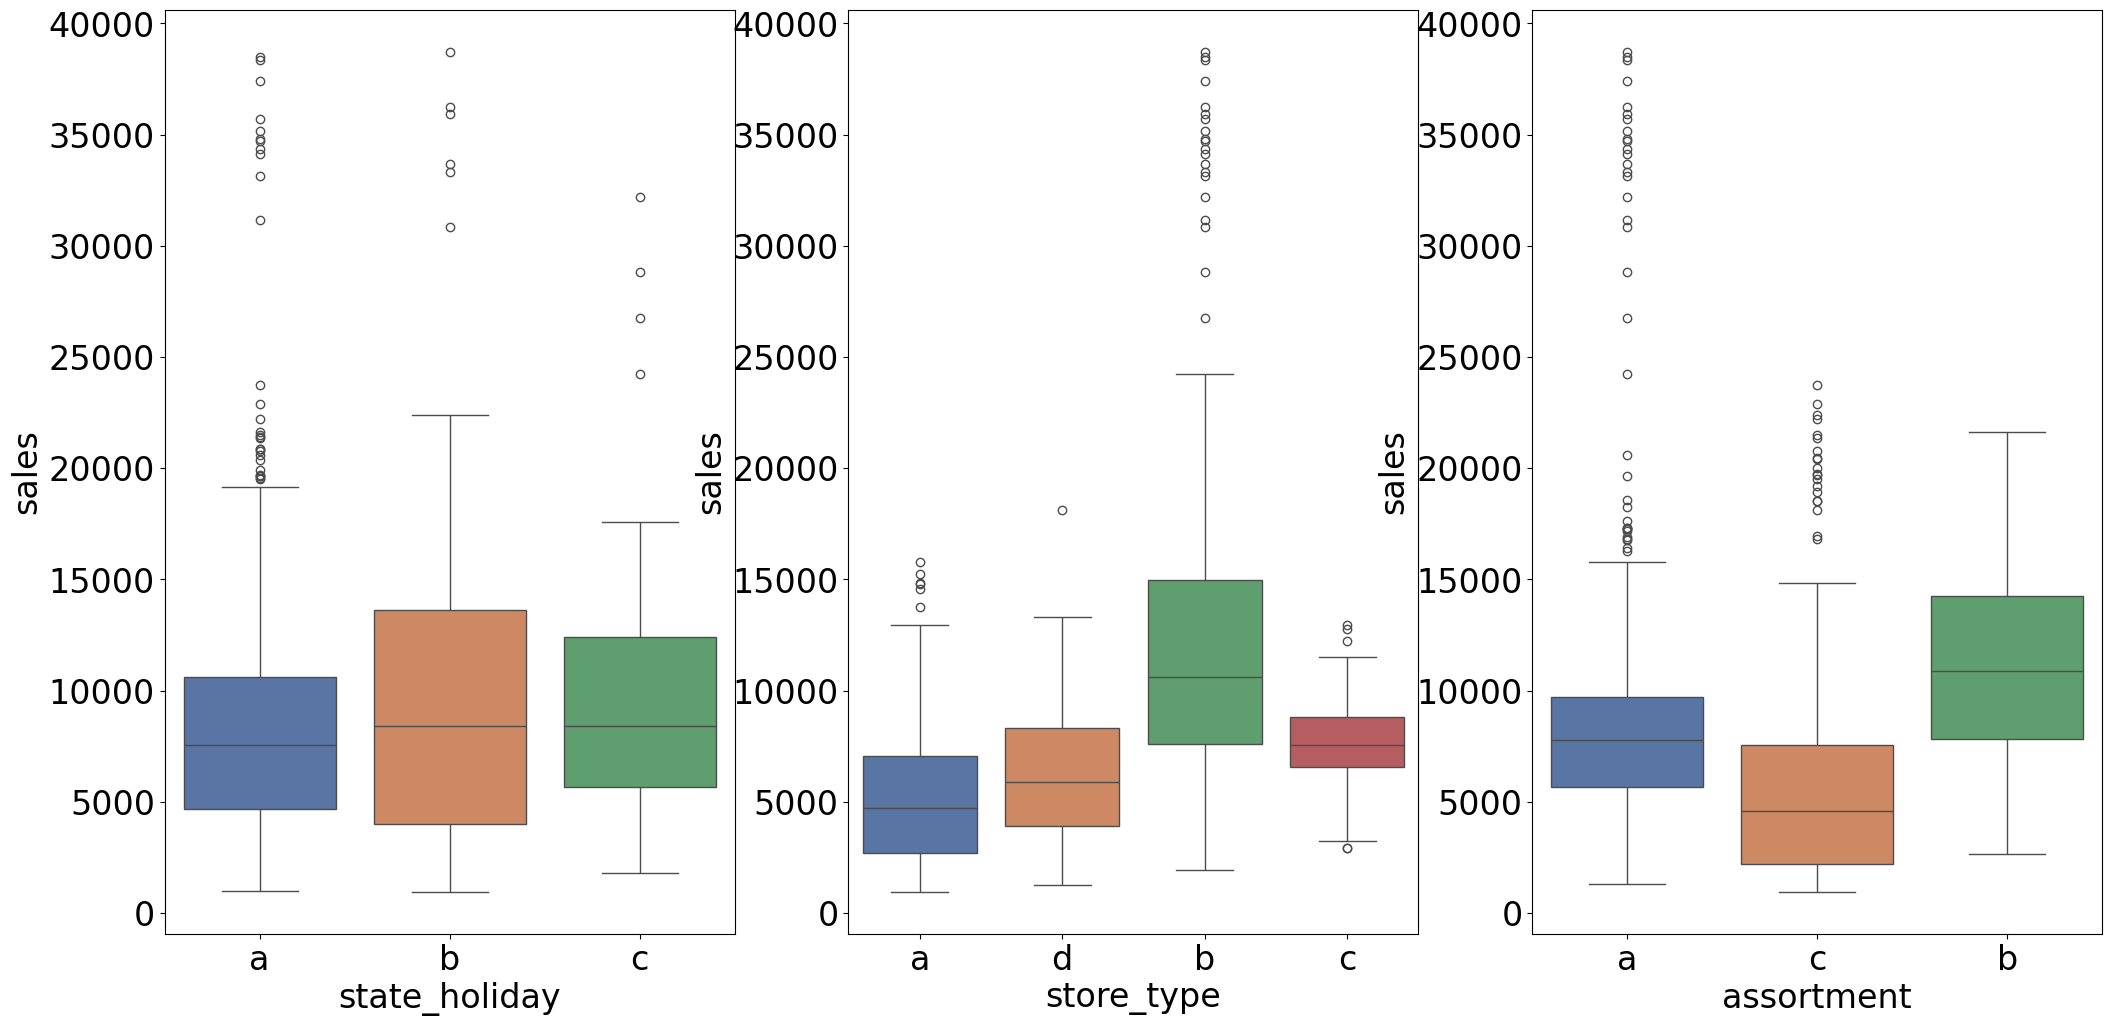

In [28]:
filtro = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=filtro, hue='state_holiday', palette='deep', legend=False)

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=filtro, hue='store_type', palette='deep', legend=False)

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=filtro, hue='assortment', palette='deep', legend=False)